In [2]:
import os
import sys
import io
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

The model we use is not exactly the standard ***infinite-range Ising model***, since we do **not** sum of self couplings:
\begin{align}
H({\bf s})&=-\frac{1}{2}\frac{J}{N}\sum_{i\ne j} s_i s_j-h\sum_i s_i\\
&=\frac{1}{2}J-\frac{1}{2}\frac{J}{N}\sum_{i,j} s_i s_j-h\sum_i s_i
\end{align}
In the first line there is a restricted sum over $i,j$ such that $i\ne j$ (i.e. no self energy).  In the second line there is no such restriction.  The second equation in the second line is what is known as the ***infinite-range Ising model***, and it is this model that we have exact solutions.

In particular, the exact result for the partition function of the ***infinite-range Ising model*** as a function of $N$ sites is
\begin{equation}
Z=\sum_{n=0}^{N}\begin{pmatrix}
N \\
n
\end{pmatrix}
f(\beta \hat{J}, \beta h, N-2 n)
\end{equation}
where $\hat J=J/N$ and
\begin{equation}
f(\beta \hat{J}, \beta h, x) \equiv e^{\frac{1}{2} \beta \hat{J} x^{2}+\beta h x}\ .
\end{equation}
In our case where we omit the self-energy, it is straightforward to see that the partition function is simply
\begin{equation}
Z=e^{\frac{1}{2}\beta J}\sum_{n=0}^{N}\begin{pmatrix}
N \\
n
\end{pmatrix} 
f(\beta \hat{J}, \beta h, N-2 n)
\end{equation}

To determine the mean energy per site I need to calculate
\begin{equation}
\langle\beta \varepsilon\rangle=-\frac{\beta}{N}\frac{\partial \log(Z)}{\partial \beta}=-\frac{\beta}{N Z} \frac{\partial Z}{\partial \beta}\ .
\end{equation}
A simple calculation then gives
\begin{equation}
\langle\beta \varepsilon\rangle=\frac{1}{2}\beta\hat J-\frac{\beta}{N Z}
\sum_{n=0}^{N}
\begin{pmatrix}
N \\
n
\end{pmatrix}\left[\frac{1}{2}\hat{J}(N-2n)^2+h(N-2n)\right]f(\beta \hat{J}, \beta h, N-2 n)\ .
\end{equation}
Let's code this up. . .

In [1]:
def f(J,h,x):
    return np.exp(.5*J*x**2+h*x)

def partitionZ(J,h,N):
    terms = np.array([scipy.special.binom(N,n)*f(J,h,N-2*n) for n in range(N+1)])
    return sum(terms)

def energy(J,h,N):
    Z = partitionZ(J,h,N)
    answer = np.array([scipy.special.binom(N,n)*
                       (.5*J*(N-2*n)**2+h*(N-2*n))*f(J,h,N-2*n)/Z 
                        for n in range(N+1)])
    return .5/N-sum(answer)/N

def magnetization(J,h,N):
    Z = partitionZ(J,h,N)
    answer = np.array([scipy.special.binom(N,n)*
                       (N-2*n)*f(J,h,N-2*n)/Z 
                        for n in range(N+1)])
    return sum(answer)/N


So here is a plot of the internal energy:

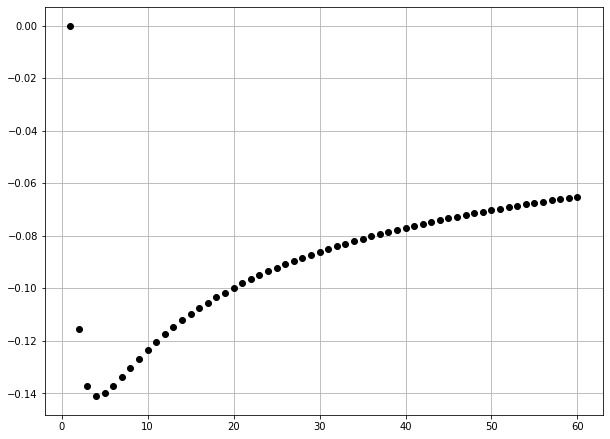

In [3]:
NN = [n for n in range(1,61)]
ee = [energy(1/N,0,N) for N in NN]

fig,ax = plt.subplots(1,1,figsize=(10,7.5))
ax.plot(NN,ee,'ko')
ax.grid()

Let's compare with my results in `exact_long_range_energy.txt`

In [4]:
data = open("exact_long_range_energy.txt","r").readlines()
xdata = [float(dat.split()[0]) for dat in data]
ydata = [float(dat.split()[1]) for dat in data]

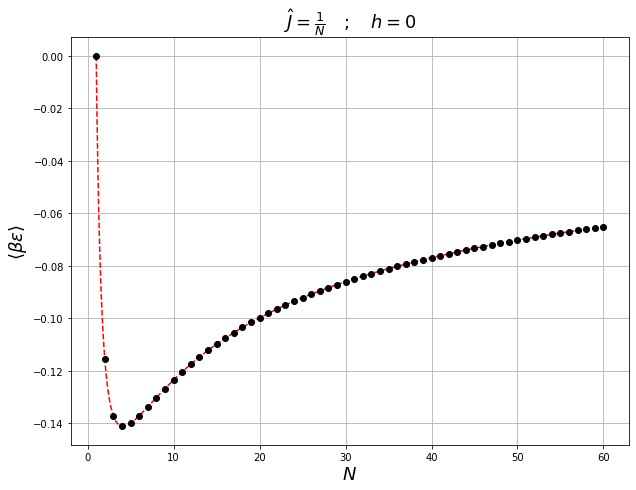

In [12]:
fig,ax = plt.subplots(1,1,figsize=(10,7.5))
ax.plot(xdata,ydata,'r--',NN,ee,'ko')
ax.set_xlabel(r'$N$',fontname='Times',fontsize=(18))
ax.set_ylabel(r'$\langle \beta \epsilon\rangle$',fontname='Times',fontsize=(18))
ax.set_title(r'$\hat{J}=\frac{1}{N}\quad;\quad h=0$', fontsize=(18))
ax.grid()

Ok, agreement is great.  So I think we understand what is going on.  There is a competition between the self-energy (or lack of) and the rest of the energy.

Here is the magnetization because I can calculate it

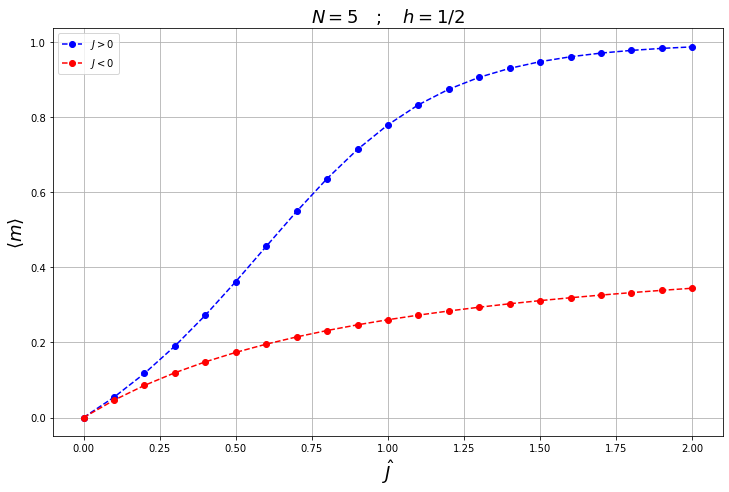

In [11]:
JJ = [n*.1 for n in range(21)]
mmJp = [magnetization(J/5,J*.5,5) for J in JJ]
mmJm = [magnetization(-J/5,J*.5,5) for J in JJ]

fig,ax = plt.subplots(1,1,figsize=(12,7.5))
ax.plot(JJ,mmJp,'bo--',label=r'$J>0$')
ax.plot(JJ,mmJm,'ro--',label=r'$J<0$')
ax.set_xlabel(r'$\hat J$',fontname='Times',fontsize=(18))
ax.set_ylabel(r'$\langle m\rangle$',fontname='Times',fontsize=(18))
ax.set_title(r'$N=5\quad;\quad h=1/2$',fontsize=(18))
ax.legend()
ax.grid()